In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pickle
from collections import OrderedDict

from scipy.optimize import curve_fit

def straight_line(x,m,b):
    return(m*x+b)

In [2]:
#####################
## Compaction data ##
#####################

p1_200_1 = pickle.load(open("p1_K49A_200nm_fc1s1_compact.p", "rb")) 
p1_200_2 = pickle.load(open("p1_K49A_200nm_fc1s2_compact.p", "rb"))
p1_200_3 = pickle.load(open("p1_K49A_200nm_fc2s1_compact.p", "rb")) 
p1_200_4 = pickle.load(open("p1_K49A_200nm_fc2s2_compact.p", "rb"))

p1_225_1 = pickle.load(open("p1_K49A_225nm_fc1s1_compact.p", "rb")) 
p1_225_2 = pickle.load(open("p1_K49A_225nm_fc1s2_compact.p", "rb"))
p1_225_3 = pickle.load(open("p1_K49A_225nm_fc2s1_compact.p", "rb")) 
p1_225_4 = pickle.load(open("p1_K49A_225nm_fc2s2_compact.p", "rb"))
p1_225_5 = pickle.load(open("p1_K49A_225nm_fc3s1_compact.p", "rb")) 

p1_250_1 = pickle.load(open("p1_K49A_250nm_fc1s1_compact.p", "rb")) 
p1_250_2 = pickle.load(open("p1_K49A_250nm_fc1s2_compact.p", "rb"))
p1_250_3 = pickle.load(open("p1_K49A_250nm_fc2s1_compact.p", "rb")) 
p1_250_4 = pickle.load(open("p1_K49A_250nm_fc2s2_compact.p", "rb"))
p1_250_5 = pickle.load(open("p1_K49A_250nm_fc3s1_compact.p", "rb")) 
p1_250_6 = pickle.load(open("p1_K49A_250nm_fc3s2_compact.p", "rb"))

p1_275_1 = pickle.load(open("p1_K49A_275nm_fc1s1_compact.p", "rb")) 
p1_275_2 = pickle.load(open("p1_K49A_275nm_fc1s2_compact.p", "rb"))
p1_275_3 = pickle.load(open("p1_K49A_275nm_fc2s1_compact.p", "rb")) 
p1_275_4 = pickle.load(open("p1_K49A_275nm_fc2s2_compact.p", "rb"))
p1_275_5 = pickle.load(open("p1_K49A_275nm_fc3s1_compact.p", "rb")) 
p1_275_6 = pickle.load(open("p1_K49A_275nm_fc3s2_compact.p", "rb"))


#######################
## Decompaction data ##
#######################

D_p1_200_1 = pickle.load(open("p1_K49A_200nm_fc1s1_decompaction.p", "rb"))
D_p1_200_2 = pickle.load(open("p1_K49A_200nm_fc1s2_decompaction.p", "rb"))

D_p1_225_1 = pickle.load(open("p1_K49A_225nm_fc1s1_decompaction.p", "rb"))
D_p1_225_2 = pickle.load(open("p1_K49A_225nm_fc1s2_decompaction.p", "rb"))
D_p1_225_3 = pickle.load(open("p1_K49A_225nm_fc2s2_decompaction.p", "rb"))

D_p1_250_1 = pickle.load(open("p1_K49A_250nm_fc1s1_decompaction.p", "rb"))
D_p1_250_2 = pickle.load(open("p1_K49A_250nm_fc1s2_decompaction.p", "rb"))
D_p1_250_3 = pickle.load(open("p1_K49A_250nm_fc2s1_decompaction.p", "rb"))
D_p1_250_4 = pickle.load(open("p1_K49A_250nm_fc2s2_decompaction.p", "rb"))
D_p1_250_5 = pickle.load(open("p1_K49A_250nm_fc3s1_decompaction.p", "rb"))
D_p1_250_6 = pickle.load(open("p1_K49A_250nm_fc3s2_decompaction.p", "rb"))

D_p1_275_1 = pickle.load(open("p1_K49A_275nm_fc1s1_decompaction.p", "rb"))
D_p1_275_2 = pickle.load(open("p1_K49A_275nm_fc1s2_decompaction.p", "rb"))
D_p1_275_3 = pickle.load(open("p1_K49A_275nm_fc2s1_decompaction.p", "rb"))
D_p1_275_4 = pickle.load(open("p1_K49A_275nm_fc2s2_decompaction.p", "rb"))
D_p1_275_5 = pickle.load(open("p1_K49A_275nm_fc3s1_decompaction.p", "rb"))
D_p1_275_6 = pickle.load(open("p1_K49A_275nm_fc3s2_decompaction.p", "rb"))





Individual Average Plots
----

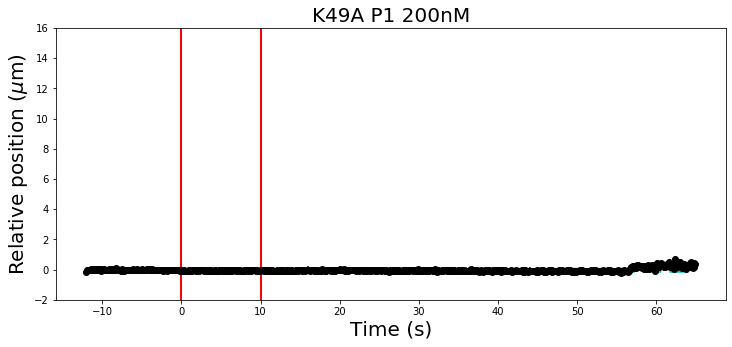

average velocity:  0.00 um/s
Number of traces = 48
Offset time = 23.3
Offset position = 53.60889270159771


In [23]:
D = OrderedDict()
count = 0
y_offsets = []
for dataset,velo in [p1_200_1,p1_200_2,p1_200_3,p1_200_4]:
    for trace in dataset:
        count+=1
        x,y = trace
        offset = np.mean(y[0:15])
        y_offsets.append(offset)
        new_y = [(offset-i)*.266 for i in y]
        new_x = [i*0.1 for i in x]
        for t,p in zip(new_x,new_y):
            D.setdefault(t, []).append(p)
            
Averaged = sorted([(t,np.mean(p)) for t, p in D.items()], key=lambda x: x[0])
errors = sorted([(t,np.std(p)) for t, p in D.items()], key=lambda x: x[0])
t,a = map(list, zip(*Averaged))
_,s = map(list, zip(*errors))

l,r = 120,220
framerate = 0.1
offset_time = t[l]
t = [i-t[0] for i in t]
shifted_t = [i-t[l] for i in t]
data = [shifted_t,a,s]
pickle.dump(data, open("K49A_p1_200_average.p", "wb"))


p,e = curve_fit(straight_line,shifted_t[l:r],a[l:r])

fig = plt.figure(figsize = (12,5))
ax1 = fig.add_subplot(111)
ax1.plot(shifted_t,straight_line(np.array(shifted_t),*p), "c--", linewidth = 5)
ax1.axvline(x=0*framerate,color = "red", linewidth = 2)
ax1.axvline(x=(r-l)*framerate,color = "red", linewidth = 2)
ax1.errorbar(shifted_t,a, yerr = s, 
             marker = "o", linestyle = "None", 
             errorevery=5, color = "k") 
#ax1.set_xlim(14,25)
ax1.set_ylim(-2,16)
ax1.set_xlabel("Time (s)", fontsize = 20)
ax1.set_ylabel("Relative position ($\mu$m)",
               fontsize = 20)
ax1.set_title("K49A P1 200nM", fontsize = 20)
plt.show()

print("average velocity: ","{:.2f}".format(p[0]),"um/s")
print("Number of traces = "+str(count))
print("Offset time = "+str(offset_time))
print("Offset position = "+str(np.mean(y_offsets)))


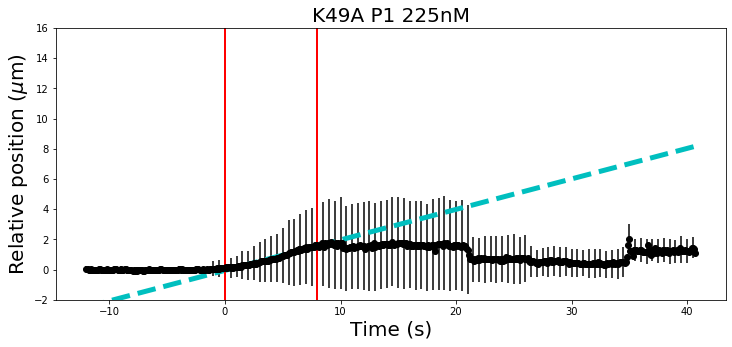

average velocity:  0.20 um/s
Number of traces = 74
Offset time = 21.900000000000002
Offset position = 54.35262137242815


In [9]:
D = OrderedDict()
count = 0
y_offsets = []
for dataset,velo in [p1_225_1,p1_225_2,p1_225_3,p1_225_4,p1_225_5]:
    for trace in dataset:
        count+=1
        x,y = trace
        offset = np.mean(y[0:15])
        y_offsets.append(offset)
        new_y = [(offset-i)*.266 for i in y]
        new_x = [i*0.1 for i in x]
        for t,p in zip(new_x,new_y):
            D.setdefault(t, []).append(p)
            
Averaged = sorted([(t,np.mean(p)) for t, p in D.items()], key=lambda x: x[0])
errors = sorted([(t,np.std(p)) for t, p in D.items()], key=lambda x: x[0])
t,a = map(list, zip(*Averaged))
_,s = map(list, zip(*errors))

l,r = 120,200
framerate = 0.1
offset_time = t[l]
t = [i-t[0] for i in t]
shifted_t = [i-t[l] for i in t]
data = [shifted_t,a,s]
pickle.dump(data, open("K49A_p1_225_average.p", "wb"))


p,e = curve_fit(straight_line,shifted_t[l:r],a[l:r])

fig = plt.figure(figsize = (12,5))
ax1 = fig.add_subplot(111)
ax1.plot(shifted_t,straight_line(np.array(shifted_t),*p), "c--", linewidth = 5)
ax1.axvline(x=0*framerate,color = "red", linewidth = 2)
ax1.axvline(x=(r-l)*framerate,color = "red", linewidth = 2)
ax1.errorbar(shifted_t,a, yerr = s, 
             marker = "o", linestyle = "None", 
             errorevery=5, color = "k") 
#ax1.set_xlim(14,25)
ax1.set_ylim(-2,16)
ax1.set_xlabel("Time (s)", fontsize = 20)
ax1.set_ylabel("Relative position ($\mu$m)",
               fontsize = 20)
ax1.set_title("K49A P1 225nM", fontsize = 20)
plt.show()

print("average velocity: ","{:.2f}".format(p[0]),"um/s")
print("Number of traces = "+str(count))
print("Offset time = "+str(offset_time))
print("Offset position = "+str(np.mean(y_offsets)))


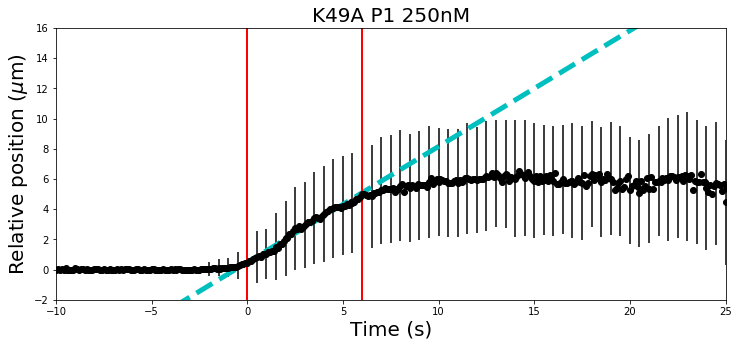

average velocity:  0.77 um/s
Number of traces = 68
Offset time = 23.0
Offset position = 53.13312994906764


In [24]:
D = OrderedDict()
count = 0
y_offsets = []
for dataset,velo in [p1_250_1,p1_250_2,p1_250_3,p1_250_4,p1_250_5,p1_250_6]:
    for trace in dataset:
        count+=1
        x,y = trace
        offset = np.mean(y[0:15])
        y_offsets.append(offset)
        new_y = [(offset-i)*.266 for i in y]
        new_x = [i*0.1 for i in x]
        for t,p in zip(new_x,new_y):
            D.setdefault(t, []).append(p)
            
Averaged = sorted([(t,np.mean(p)) for t, p in D.items()], key=lambda x: x[0])
errors = sorted([(t,np.std(p)) for t, p in D.items()], key=lambda x: x[0])
t,a = map(list, zip(*Averaged))
_,s = map(list, zip(*errors))

l,r = 120,180
framerate = 0.1
offset_time = t[l]
t = [i-t[0] for i in t]
shifted_t = [i-t[l] for i in t]
data = [shifted_t,a,s]
pickle.dump(data, open("K49A_p1_250_average.p", "wb"))


p,e = curve_fit(straight_line,shifted_t[l:r],a[l:r])

fig = plt.figure(figsize = (12,5))
ax1 = fig.add_subplot(111)
ax1.plot(shifted_t,straight_line(np.array(shifted_t),*p), "c--", linewidth = 5)
ax1.axvline(x=0*framerate,color = "red", linewidth = 2)
ax1.axvline(x=(r-l)*framerate,color = "red", linewidth = 2)
ax1.errorbar(shifted_t,a, yerr = s, 
             marker = "o", linestyle = "None", 
             errorevery=5, color = "k") 
ax1.set_xlim(-10,25)
ax1.set_ylim(-2,16)
ax1.set_xlabel("Time (s)", fontsize = 20)
ax1.set_ylabel("Relative position ($\mu$m)",
               fontsize = 20)
ax1.set_title("K49A P1 250nM", fontsize = 20)
plt.show()

print("average velocity: ","{:.2f}".format(p[0]),"um/s")
print("Number of traces = "+str(count))
print("Offset time = "+str(offset_time))
print("Offset position = "+str(np.mean(y_offsets)))


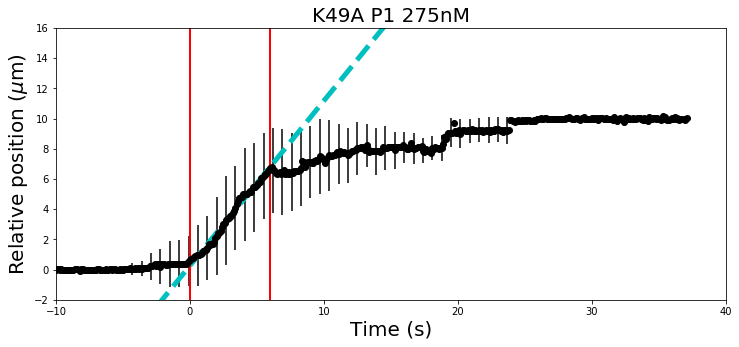

average velocity:  1.09 um/s
Number of traces = 81
Offset time = 23.6
Offset position = 51.72083210731282


In [25]:
D = OrderedDict()
count = 0
y_offsets = []
for dataset,velo in [p1_275_1,p1_275_2,p1_275_3,p1_275_4,p1_275_5,p1_275_6]:
    for trace in dataset:
        count+=1
        x,y = trace
        offset = np.mean(y[0:15])
        y_offsets.append(offset)
        new_y = [(offset-i)*.266 for i in y]
        new_x = [i*0.1 for i in x]
        for t,p in zip(new_x,new_y):
            D.setdefault(t, []).append(p)
            
Averaged = sorted([(t,np.mean(p)) for t, p in D.items()], key=lambda x: x[0])
errors = sorted([(t,np.std(p)) for t, p in D.items()], key=lambda x: x[0])
t,a = map(list, zip(*Averaged))
_,s = map(list, zip(*errors))

l,r = 120,180
framerate = 0.1
offset_time = t[l]
t = [i-t[0] for i in t]
shifted_t = [i-t[l] for i in t]
data = [shifted_t,a,s]
pickle.dump(data, open("K49A_p1_275_average.p", "wb"))


p,e = curve_fit(straight_line,shifted_t[l:r],a[l:r])

fig = plt.figure(figsize = (12,5))
ax1 = fig.add_subplot(111)
ax1.plot(shifted_t,straight_line(np.array(shifted_t),*p), "c--", linewidth = 5)
ax1.axvline(x=0*framerate,color = "red", linewidth = 2)
ax1.axvline(x=(r-l)*framerate,color = "red", linewidth = 2)
ax1.errorbar(shifted_t,a, yerr = s, 
             marker = "o", linestyle = "None", 
             errorevery=7, color = "k") 
ax1.set_xlim(-10,40)
ax1.set_ylim(-2,16)
ax1.set_xlabel("Time (s)", fontsize = 20)
ax1.set_ylabel("Relative position ($\mu$m)",
               fontsize = 20)
ax1.set_title("K49A P1 275nM", fontsize = 20)
plt.show()

print("average velocity: ","{:.2f}".format(p[0]),"um/s")
print("Number of traces = "+str(count))
print("Offset time = "+str(offset_time))
print("Offset position = "+str(np.mean(y_offsets)))


Altogether Average Plot
----

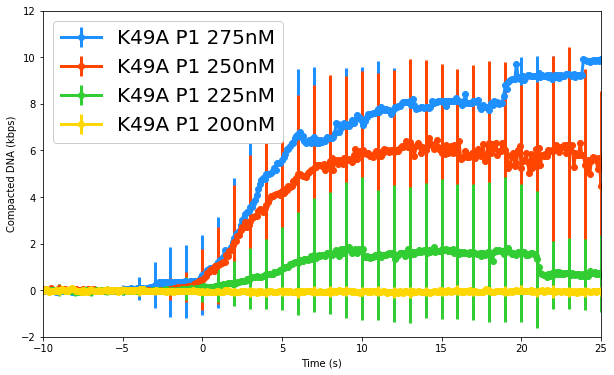

In [24]:
t_200,a_200,s_200 = pickle.load(open("K49A_p1_200_average.p", "rb"))
t_225,a_225,s_225 = pickle.load(open("K49A_p1_225_average.p", "rb"))
t_250,a_250,s_250 = pickle.load(open("K49A_p1_250_average.p", "rb"))
t_275,a_275,s_275 = pickle.load(open("K49A_p1_275_average.p", "rb"))


fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(111)

ax1.errorbar(t_275,a_275, yerr = s_275, 
             marker = "o", linewidth = 3, 
             errorevery=10, color = "dodgerblue",
             label = "K49A P1 275nM")
ax1.errorbar(t_250,a_250, yerr = s_250, 
             marker = "o", linewidth = 3, 
             errorevery=10, color = "orangered",
             label = "K49A P1 250nM")
ax1.errorbar(t_225,a_225, yerr = s_225, 
             marker = "o", linewidth = 3, 
             errorevery=10, color = "limegreen",
             label = "K49A P1 225nM")
ax1.errorbar(t_200,a_200, yerr = s_200, 
             marker = "o", linewidth = 3, 
             errorevery=10, color = "gold", 
             label = "K49A P1 200nM")



ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Compacted DNA (kbps)")

ax1.set_xlim(-10,25)
ax1.set_ylim(-2,12)
plt.legend(loc=2, framealpha = 1, fontsize = 20)
#plt.savefig("abc_out.pdf", format = "pdf")
plt.show()


Individual Busy Plots
----

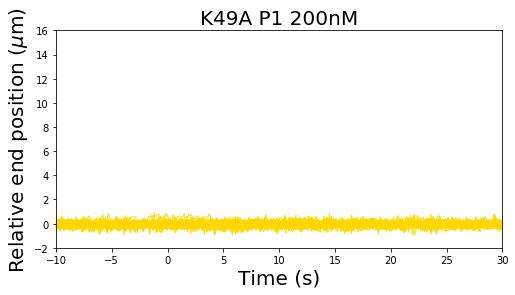

In [28]:
fig = plt.figure(figsize = (8,4))

""" 200nM plots """
ax1 = fig.add_subplot(111)
for dataset,velo in [p1_200_1,p1_200_2,p1_200_3,p1_200_4]:
    for trace in dataset:
        x,y = trace
        offset = np.mean(y[0:15])
        new_y = [(offset-i)*.266 for i in y]
        new_x = [i*0.1 for i in x]
        shifted_x = [i-23.3 for i in new_x]
        ax1.plot(shifted_x,new_y,color = "gold",
                 linewidth = 1)
        
ax1.set_ylim(-2,16)
ax1.set_xlim(-10,30)
ax1.set_xlabel("Time (s)", fontsize = 20)
ax1.set_ylabel("Relative end position ($\mu$m)",
               fontsize = 20)
ax1.set_title("K49A P1 200nM", fontsize = 20)

plt.show()

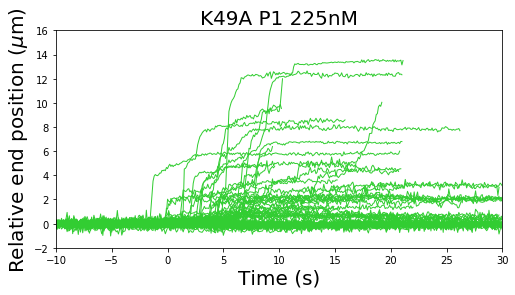

In [27]:
fig = plt.figure(figsize = (8,4))

ax1 = fig.add_subplot(111)
for dataset,velo in [p1_225_1,p1_225_2,p1_225_3,p1_225_4,p1_225_5]:
    for trace in dataset:
        x,y = trace
        offset = np.mean(y[0:15])
        new_y = [(offset-i)*.266 for i in y]
        new_x = [i*0.1 for i in x]
        shifted_x = [i-21.9 for i in new_x]
        ax1.plot(shifted_x,new_y,color = "limegreen",
                 linewidth = 1)
        
ax1.set_ylim(-2,16)
ax1.set_xlim(-10,30)
ax1.set_xlabel("Time (s)", fontsize = 20)
ax1.set_ylabel("Relative end position ($\mu$m)",
               fontsize = 20)
ax1.set_title("K49A P1 225nM", fontsize = 20)
plt.show()

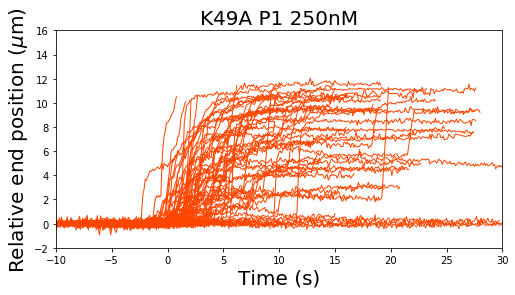

In [28]:
fig = plt.figure(figsize = (8,4))

ax1 = fig.add_subplot(111)
for dataset,velo in [p1_250_1,p1_250_2,p1_250_3,p1_250_4,p1_250_5,p1_250_6]:
    for trace in dataset:
        x,y = trace
        offset = np.mean(y[0:15])
        new_y = [(offset-i)*.266 for i in y]
        new_x = [i*0.1 for i in x]
        shifted_x = [i-23.0 for i in new_x]
        ax1.plot(shifted_x,new_y,color = "orangered",
                 linewidth = 1)
        
ax1.set_ylim(-2,16)
ax1.set_xlim(-10,30)
ax1.set_xlabel("Time (s)", fontsize = 20)
ax1.set_ylabel("Relative end position ($\mu$m)",
               fontsize = 20)
ax1.set_title("K49A P1 250nM", fontsize = 20)
plt.show()

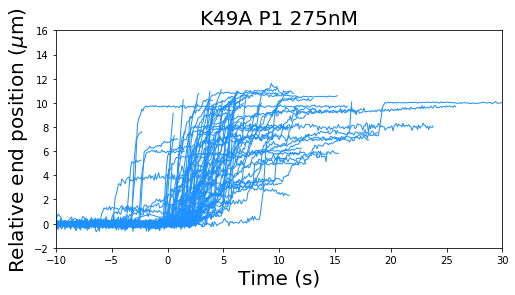

In [29]:
fig = plt.figure(figsize = (8,4))

ax1 = fig.add_subplot(111)
for dataset,velo in [p1_275_1,p1_275_2,p1_275_3,p1_275_4,p1_275_5,p1_275_6]:
    for trace in dataset:
        x,y = trace
        offset = np.mean(y[0:15])
        new_y = [(offset-i)*.266 for i in y]
        new_x = [i*0.1 for i in x]
        shifted_x = [i-23.6 for i in new_x]
        ax1.plot(shifted_x,new_y,color = "dodgerblue",
                 linewidth = 1)
        
ax1.set_ylim(-2,16)
ax1.set_xlim(-10,30)
ax1.set_xlabel("Time (s)", fontsize = 20)
ax1.set_ylabel("Relative end position ($\mu$m)",
               fontsize = 20)
ax1.set_title("K49A P1 275nM", fontsize = 20)
plt.show()

Altogether Busy Plot
----

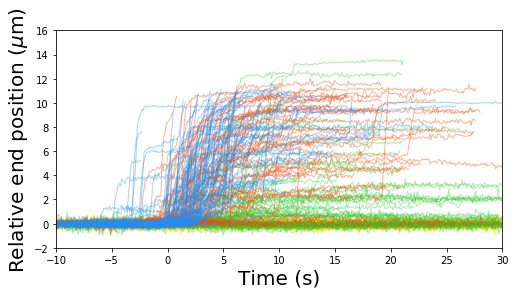

In [30]:
fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(111)
for dataset,velo in [p1_200_1,p1_200_2,p1_200_3,p1_200_4]:
    for trace in dataset:
        x,y = trace
        offset = np.mean(y[0:15])
        new_y = [(offset-i)*.266 for i in y]
        new_x = [i*0.1 for i in x]
        shifted_x = [i-23.3 for i in new_x]
        ax1.plot(shifted_x,new_y,color = "gold",
                 linewidth = 1, alpha = 0.4)
for dataset,velo in [p1_225_1,p1_225_2,p1_225_3,p1_225_4,p1_225_5]:
    for trace in dataset:
        x,y = trace
        offset = np.mean(y[0:15])
        new_y = [(offset-i)*.266 for i in y]
        new_x = [i*0.1 for i in x]
        shifted_x = [i-21.9 for i in new_x]
        ax1.plot(shifted_x,new_y,color = "limegreen",
                 linewidth = 1, alpha = 0.4)
for dataset,velo in [p1_250_1,p1_250_2,p1_250_3,p1_250_4,p1_250_5,p1_250_6]:
    for trace in dataset:
        x,y = trace
        offset = np.mean(y[0:15])
        new_y = [(offset-i)*.266 for i in y]
        new_x = [i*0.1 for i in x]
        shifted_x = [i-23.0 for i in new_x]
        ax1.plot(shifted_x,new_y,color = "orangered",
                 linewidth = 1, alpha = 0.4)
for dataset,velo in [p1_275_1,p1_275_2,p1_275_3,p1_275_4,p1_275_5,p1_275_6]:
    for trace in dataset:
        x,y = trace
        offset = np.mean(y[0:15])
        new_y = [(offset-i)*.266 for i in y]
        new_x = [i*0.1 for i in x]
        shifted_x = [i-23.6 for i in new_x]
        ax1.plot(shifted_x,new_y,color = "dodgerblue",
                 linewidth = 1, alpha = 0.4)
        
ax1.set_ylim(-2,16)
ax1.set_xlim(-10,30)
ax1.set_xlabel("Time (s)", fontsize = 20)
ax1.set_ylabel("Relative end position ($\mu$m)",
               fontsize = 20)
plt.show()

----

Velocity Histograms
----

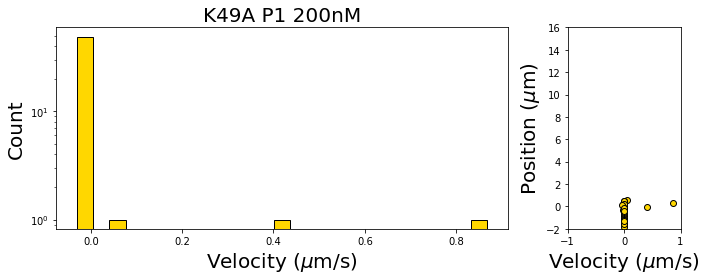

In [33]:

velocities = []
stop_positions = []

for dataset,velo in [p1_200_1,p1_200_2,p1_200_3,p1_200_4]:
    for i in velo:
        for pos,speed in i:
            speed_rescaled = (-1*speed)*(10)*(.266)
            velocities.append(speed_rescaled)
            stop_positions.append((51.448-pos)*.266)
        

fig = plt.figure(figsize = (10,4))
gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1]) 
ax1 = fig.add_subplot(gs[0])
ax1.hist(velocities,25,fc = "gold", ec = "k")
ax1.set_xlabel("Velocity ($\mu$m/s)", fontsize = 20)
ax1.set_ylabel("Count",
               fontsize = 20)
ax1.set_title("K49A P1 200nM", fontsize = 20)
ax1.set_yscale('log', nonposy='clip')


ax2 = fig.add_subplot(gs[1])
ax2.scatter(velocities,stop_positions, fc = "gold", 
            ec = "k")

ax2.set_xlabel("Velocity ($\mu$m/s)", fontsize = 20)
ax2.set_ylabel("Position ($\mu$m)",
               fontsize = 20)
ax2.set_ylim(-2,16)
ax2.set_xlim(-1,1)
plt.tight_layout()
plt.show()

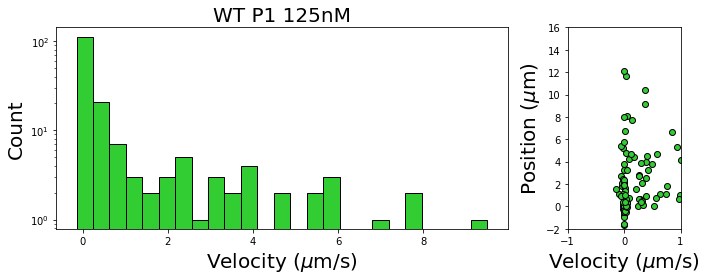

In [34]:
velocities = []
stop_positions = []

for dataset,velo in [p1_225_1,p1_225_2,p1_225_3,p1_225_4, p1_225_5]:
    for i in velo:
        for pos,speed in i:
            speed_rescaled = (-1*speed)*(10)*(.266)
            velocities.append(speed_rescaled)
            stop_positions.append((54.352-pos)*.266)
        

fig = plt.figure(figsize = (10,4))
gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1]) 
ax1 = fig.add_subplot(gs[0])
ax1.hist(velocities,25,fc = "limegreen", ec = "k")
ax1.set_xlabel("Velocity ($\mu$m/s)", fontsize = 20)
ax1.set_ylabel("Count",
               fontsize = 20)
ax1.set_title("WT P1 125nM", fontsize = 20)
ax1.set_yscale('log', nonposy='clip')


ax2 = fig.add_subplot(gs[1])
ax2.scatter(velocities,stop_positions, fc = "limegreen", ec = "k")

ax2.set_xlabel("Velocity ($\mu$m/s)", fontsize = 20)
ax2.set_ylabel("Position ($\mu$m)",
               fontsize = 20)
ax2.set_ylim(-2,16)
ax2.set_xlim(-1,1)
plt.tight_layout()
plt.show()

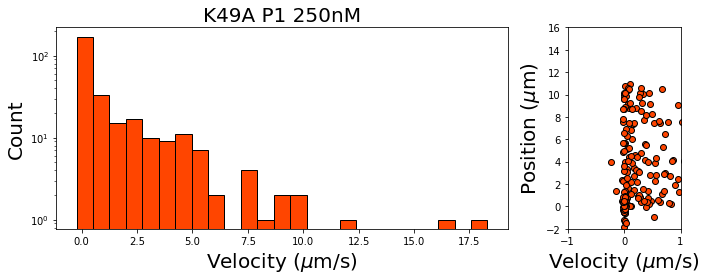

In [35]:
velocities = []
stop_positions = []

for dataset,velo in [p1_250_1,p1_250_2,p1_250_3,p1_250_4,p1_250_5,p1_250_6]:
    for i in velo:
        for pos,speed in i:
            speed_rescaled = (-1*speed)*(10)*(.266)
            velocities.append(speed_rescaled)
            stop_positions.append((53.133-pos)*.266)
        

fig = plt.figure(figsize = (10,4))
gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1]) 
ax1 = fig.add_subplot(gs[0])
ax1.hist(velocities,25,fc = "orangered", ec = "k")
ax1.set_xlabel("Velocity ($\mu$m/s)", fontsize = 20)
ax1.set_ylabel("Count",
               fontsize = 20)
ax1.set_title("K49A P1 250nM", fontsize = 20)
ax1.set_yscale('log', nonposy='clip')


ax2 = fig.add_subplot(gs[1])
ax2.scatter(velocities,stop_positions, fc = "orangered", 
            ec = "k")

ax2.set_xlabel("Velocity ($\mu$m/s)", fontsize = 20)
ax2.set_ylabel("Position ($\mu$m)",
               fontsize = 20)
ax2.set_ylim(-2,16)
ax2.set_xlim(-1,1)
plt.tight_layout()
plt.show()

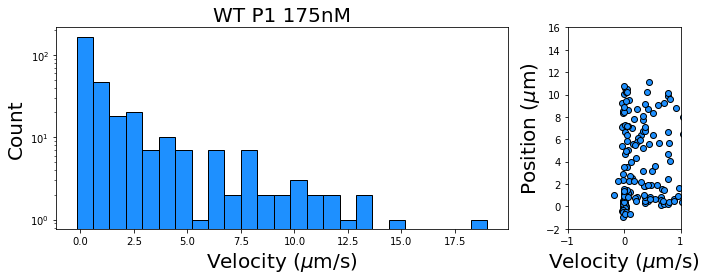

In [36]:
velocities = []
stop_positions = []

for dataset,velo in [p1_275_1,p1_275_2,p1_275_3,p1_275_4,p1_275_5,p1_275_6]:
    for i in velo:
        for pos,speed in i:
            speed_rescaled = (-1*speed)*(10)*(.266)
            velocities.append(speed_rescaled)
            stop_positions.append((51.72-pos)*.266)
        

fig = plt.figure(figsize = (10,4))
gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1]) 
ax1 = fig.add_subplot(gs[0])
ax1.hist(velocities,25,fc = "dodgerblue", ec = "k")
ax1.set_xlabel("Velocity ($\mu$m/s)", fontsize = 20)
ax1.set_ylabel("Count",
               fontsize = 20)
ax1.set_title("WT P1 175nM", fontsize = 20)
ax1.set_yscale('log', nonposy='clip')


ax2 = fig.add_subplot(gs[1])
ax2.scatter(velocities,stop_positions, fc = "dodgerblue", 
            ec = "k")

ax2.set_xlabel("Velocity ($\mu$m/s)", fontsize = 20)
ax2.set_ylabel("Position ($\mu$m)",
               fontsize = 20)
ax2.set_ylim(-2,16)
ax2.set_xlim(-1,1)
plt.tight_layout()
plt.show()

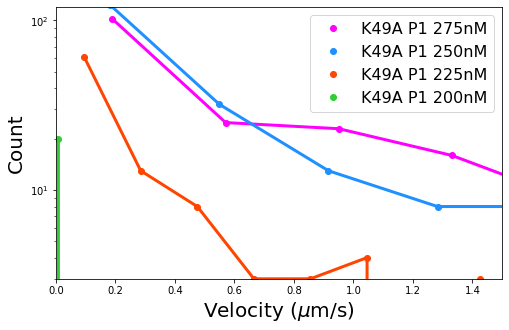

In [37]:
velocities_200 = []
for dataset,velo in [p1_200_1,p1_200_2,p1_200_3,p1_200_4]:
    for i in velo:
        for pos,speed in i:
            speed_rescaled = (-1*speed)*(10)*(.266)
            if speed_rescaled > 0:
                velocities_200.append(speed_rescaled)
velocities_225 = []
for dataset,velo in [p1_225_1,p1_225_2,p1_225_3,p1_225_4,p1_225_5]:
    for i in velo:
        for pos,speed in i:
            speed_rescaled = (-1*speed)*(10)*(.266)
            if speed_rescaled > 0:
                velocities_225.append(speed_rescaled)
velocities_250 = []
for dataset,velo in [p1_250_1,p1_250_2,p1_250_3,p1_250_4,p1_250_5,p1_250_6]:
    for i in velo:
        for pos,speed in i:
            speed_rescaled = (-1*speed)*(10)*(.266)
            if speed_rescaled > 0:
                velocities_250.append(speed_rescaled)
velocities_275 = []
for dataset,velo in [p1_275_1,p1_275_2,p1_275_3,p1_275_4,p1_275_5,p1_275_6]:
    for i in velo:
        for pos,speed in i:
            speed_rescaled = (-1*speed)*(10)*(.266)
            if speed_rescaled > 0:
                velocities_275.append(speed_rescaled)


            
plt.figure(figsize = (8,5))

n,bins = np.histogram(velocities_275, 50)
cens = [bins[i]+((bins[i+1]-bins[i])/2) for i in range(len(bins)-1)]
plt.semilogy(cens,n, c = "fuchsia", linewidth = 3)
plt.semilogy(cens,n, c = "fuchsia", marker = "o", 
             linestyle = "None", label = "K49A P1 275nM")

n,bins = np.histogram(velocities_250, 50)
cens = [bins[i]+((bins[i+1]-bins[i])/2) for i in range(len(bins)-1)]
plt.semilogy(cens,n,c = "dodgerblue", linewidth = 3)
plt.semilogy(cens,n, c = "dodgerblue", marker = "o", 
             linestyle = "None", label = "K49A P1 250nM")

n,bins = np.histogram(velocities_225, 50)
cens = [bins[i]+((bins[i+1]-bins[i])/2) for i in range(len(bins)-1)]
plt.semilogy(cens,n,c = "orangered", linewidth = 3)
plt.semilogy(cens,n, c = "orangered", marker = "o", 
             linestyle = "None", label = "K49A P1 225nM")

n,bins = np.histogram(velocities_200, 50)
cens = [bins[i]+((bins[i+1]-bins[i])/2) for i in range(len(bins)-1)]
plt.semilogy(cens,n,c = "limegreen", linewidth = 3)
plt.semilogy(cens,n, c = "limegreen", marker = "o", 
             linestyle = "None", label = "K49A P1 200nM")




plt.ylim(3,120)
plt.xlim(0,1.5)
plt.xlabel("Velocity ($\mu$m/s)", fontsize = 20)
plt.ylabel("Count",fontsize = 20)
plt.legend(fontsize = 16)

plt.show()
        
        

Travel Distance
----

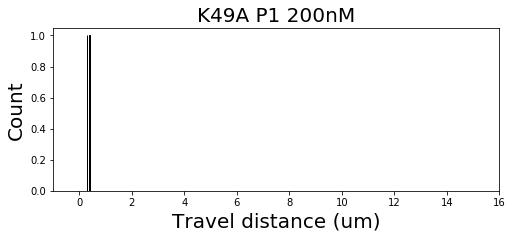

average travel distance:  0.34 um
average travel distance:  1302.61 bp


In [38]:
travel_dist = []
for dataset,velo in [p1_200_1,p1_200_2,p1_200_3,p1_200_4]:
    for i in velo:
        if len(i)>2:
            stop_positions = []
            for pos,speed in i:
                speed_rescaled = (-1*speed)*(10)*(.266)
                if abs(speed_rescaled)<0.1:
                    stop_positions.append((53.60-pos)*.266)
            for d in np.diff(stop_positions):
                travel_dist.append(d)
plt.figure(figsize = (8,3)) 
plt.hist(travel_dist, 25, fc = "gold", ec = "k")
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Travel distance (um)", fontsize = 20)
plt.title("K49A P1 200nM", fontsize = 20)
plt.xlim(-1,16)
plt.show()

print("average travel distance: ","{:.2f}".format(np.mean(travel_dist)),"um")
print("average travel distance: ","{:.2f}".format((np.mean(travel_dist)/.266)*(48502/48)),"bp")




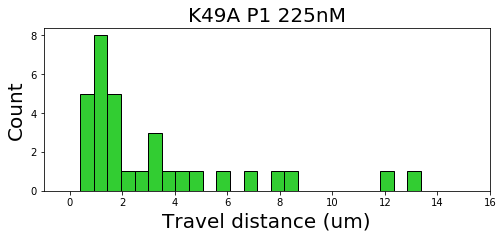

average travel distance:  3.21 um
average travel distance:  12184.75 bp


In [39]:
travel_dist = []
for dataset,velo in [p1_225_1,p1_225_2,p1_225_3,p1_225_4,p1_225_5]:
    for i in velo:
        if len(i)>2:
            stop_positions = []
            for pos,speed in i:
                speed_rescaled = (-1*speed)*(10)*(.266)
                if abs(speed_rescaled)<0.1:
                    stop_positions.append((54.35-pos)*.266)
            for d in np.diff(stop_positions):
                travel_dist.append(d)
plt.figure(figsize = (8,3)) 
plt.hist(travel_dist, 25, fc = "limegreen", ec = "k")
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Travel distance (um)", fontsize = 20)
plt.title("K49A P1 225nM", fontsize = 20)
plt.xlim(-1,16)
plt.show()

print("average travel distance: ","{:.2f}".format(np.mean(travel_dist)),"um")
print("average travel distance: ","{:.2f}".format((np.mean(travel_dist)/.266)*(48502/48)),"bp")



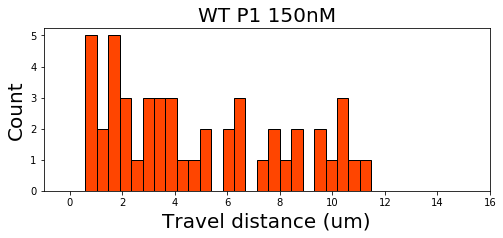

average travel distance:  4.92 um
average travel distance:  18678.19 bp


In [40]:
travel_dist = []
for dataset,velo in [p1_250_1,p1_250_2,p1_250_3,p1_250_4,p1_250_5,p1_250_6]:
    for i in velo:
        if len(i)>2:
            stop_positions = []
            for pos,speed in i:
                speed_rescaled = (-1*speed)*(10)*(.266)
                if abs(speed_rescaled)<0.1:
                    stop_positions.append((53.13-pos)*.266)
            for d in np.diff(stop_positions):
                travel_dist.append(d)
plt.figure(figsize = (8,3)) 
plt.hist(travel_dist, 25, fc = "orangered", ec = "k")
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Travel distance (um)", fontsize = 20)
plt.title("WT P1 150nM", fontsize = 20)
plt.xlim(-1,16)
plt.show()

print("average travel distance: ","{:.2f}".format(np.mean(travel_dist)),"um")
print("average travel distance: ","{:.2f}".format((np.mean(travel_dist)/.266)*(48502/48)),"bp")


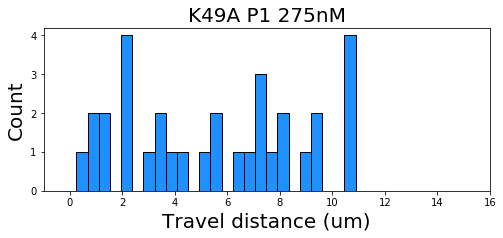

average travel distance:  5.52 um
average travel distance:  20952.68 bp


In [41]:
travel_dist = []
for dataset,velo in [p1_275_1,p1_275_2,p1_275_3,p1_275_4,p1_275_5,p1_275_6]:
    for i in velo:
        if len(i)>2:
            stop_positions = []
            for pos,speed in i:
                speed_rescaled = (-1*speed)*(10)*(.266)
                if abs(speed_rescaled)<0.1:
                    stop_positions.append((51.72-pos)*.266)
            for d in np.diff(stop_positions):
                travel_dist.append(d)
plt.figure(figsize = (8,3)) 
plt.hist(travel_dist, 25, fc = "dodgerblue", ec = "k")
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Travel distance (um)", fontsize = 20)
plt.title("K49A P1 275nM", fontsize = 20)
plt.xlim(-1,16)
plt.show()

print("average travel distance: ","{:.2f}".format(np.mean(travel_dist)),"um")
print("average travel distance: ","{:.2f}".format((np.mean(travel_dist)/.266)*(48502/48)),"bp")


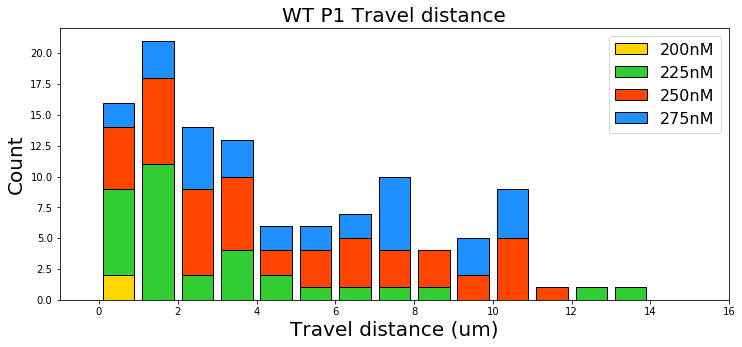

In [42]:
plt.figure(figsize = (12,5))

travel_dist = []
for dataset,velo in [p1_200_1,p1_200_2,p1_200_3,p1_200_4]:
    for i in velo:
        if len(i)>2:
            stop_positions = []
            for pos,speed in i:
                speed_rescaled = (-1*speed)*(10)*(.266)
                if abs(speed_rescaled)<0.1:
                    stop_positions.append((53.60-pos)*.266)
            for d in np.diff(stop_positions):
                travel_dist.append(d)               
n100,bins = np.histogram(travel_dist, 17, range=(-1,16))
cens = [bins[i]+((bins[i+1]-bins[i])/2) for i in range(len(bins)-1)]
plt.bar(cens,n100, fc = "gold", ec = "k", label = "200nM")

travel_dist = []
for dataset,velo in [p1_225_1,p1_225_2,p1_225_3,p1_225_4,p1_225_5]:
    for i in velo:
        if len(i)>2:
            stop_positions = []
            for pos,speed in i:
                speed_rescaled = (-1*speed)*(10)*(.266)
                if abs(speed_rescaled)<0.1:
                    stop_positions.append((54.35-pos)*.266)
            for d in np.diff(stop_positions):
                travel_dist.append(d)               
n125,bins = np.histogram(travel_dist, 17, range=(-1,16))
cens = [bins[i]+((bins[i+1]-bins[i])/2) for i in range(len(bins)-1)]
plt.bar(cens,n125, fc = "limegreen", ec = "k", 
        bottom = n100, label = "225nM")

travel_dist = []
for dataset,velo in [p1_250_1,p1_250_2,p1_250_3,p1_250_4,p1_250_5,p1_250_6]:
    for i in velo:
        if len(i)>2:
            stop_positions = []
            for pos,speed in i:
                speed_rescaled = (-1*speed)*(10)*(.266)
                if abs(speed_rescaled)<0.1:
                    stop_positions.append((53.13-pos)*.266)
            for d in np.diff(stop_positions):
                travel_dist.append(d)               
n150,bins = np.histogram(travel_dist, 17, range=(-1,16))
cens = [bins[i]+((bins[i+1]-bins[i])/2) for i in range(len(bins)-1)]
plt.bar(cens,n150, fc = "orangered", ec = "k", 
        bottom = n100+n125, label = "250nM")

travel_dist = []
for dataset,velo in [p1_275_1,p1_275_2,p1_275_3,p1_275_4,p1_275_5,p1_275_6]:
    for i in velo:
        if len(i)>2:
            stop_positions = []
            for pos,speed in i:
                speed_rescaled = (-1*speed)*(10)*(.266)
                if abs(speed_rescaled)<0.1:
                    stop_positions.append((51.72-pos)*.266)
            for d in np.diff(stop_positions):
                travel_dist.append(d)               
n175,bins = np.histogram(travel_dist, 17, range=(-1,16))
cens = [bins[i]+((bins[i+1]-bins[i])/2) for i in range(len(bins)-1)]
plt.bar(cens,n175, fc = "dodgerblue", ec = "k", 
        bottom = n100+n125+n150, label = "275nM")





plt.ylabel("Count", fontsize = 20)
plt.xlabel("Travel distance (um)", fontsize = 20)
plt.title("WT P1 Travel distance", fontsize = 20)
plt.xlim(-1,16)
plt.legend(fontsize = 16)
plt.show()


Decompaction
----

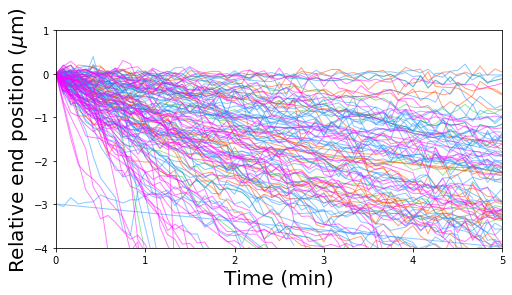

In [43]:

fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(111)

D = OrderedDict()
for dataset,velo in [D_p1_200_1,D_p1_200_2]:
    for trace in dataset:
        x,y = trace
        new_y = [(y[0]-i)*.266 for i in y]
        new_x = [(i-x[0])*(5/60) for i in x]
        ax1.plot(new_x, new_y, color = "limegreen", 
                 linewidth = 1, alpha = 0.5)
        for t,p in zip(new_x,new_y):
            D.setdefault(t, []).append(p)
            
for dataset,velo in [D_p1_225_1,D_p1_225_2,D_p1_225_3]:
    for trace in dataset:
        x,y = trace
        new_y = [(y[0]-i)*.266 for i in y]
        new_x = [(i-x[0])*(5/60) for i in x]
        ax1.plot(new_x, new_y, color = "orangered", 
                 linewidth = 1, alpha = 0.5)
        for t,p in zip(new_x,new_y):
            D.setdefault(t, []).append(p)
            
for dataset,velo in [D_p1_250_1,D_p1_250_2,D_p1_250_3,D_p1_250_4,D_p1_250_5,D_p1_250_6]:
    for trace in dataset:
        x,y = trace
        new_y = [(y[0]-i)*.266 for i in y]
        new_x = [(i-x[0])*(5/60) for i in x]
        ax1.plot(new_x, new_y, color = "dodgerblue", 
                 linewidth = 1, alpha = 0.5)
        for t,p in zip(new_x,new_y):
            D.setdefault(t, []).append(p)
        
for dataset,velo in [D_p1_275_1,D_p1_275_2,D_p1_275_3,D_p1_275_4,D_p1_275_5,D_p1_275_6]:
    for trace in dataset:
        x,y = trace
        new_y = [(y[0]-i)*.266 for i in y]
        new_x = [(i-x[0])*(5/60) for i in x]
        ax1.plot(new_x, new_y, color = "fuchsia", 
                 linewidth = 1, alpha = 0.5)
        for t,p in zip(new_x,new_y):
            D.setdefault(t, []).append(p)

            
ax1.set_ylim(-4,1)
ax1.set_xlim(0,5)
ax1.set_xlabel("Time (min)", fontsize = 20)
ax1.set_ylabel("Relative end position ($\mu$m)",
               fontsize = 20)
plt.show()

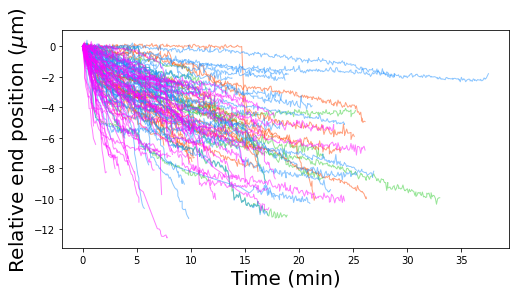

In [22]:
fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(111)

D = OrderedDict()
for dataset,velo in [D_p1_200_1,D_p1_200_2]:
    for trace in dataset:
        x,y = trace
        new_y = [(y[0]-i)*.266 for i in y]
        new_x = [round((i-x[0])*(5/60),1) for i in x]
        ax1.plot(new_x, new_y, color = "limegreen", 
                 linewidth = 1, alpha = 0.5)
        for t,p in zip(new_x,new_y):
            D.setdefault(t, []).append(p)
            
for dataset,velo in [D_p1_225_1,D_p1_225_2,D_p1_225_3]:
    for trace in dataset:
        x,y = trace
        new_y = [(y[0]-i)*.266 for i in y]
        new_x = [round((i-x[0])*(5/60),1) for i in x]
        ax1.plot(new_x, new_y, color = "orangered", 
                 linewidth = 1, alpha = 0.5)
        for t,p in zip(new_x,new_y):
            D.setdefault(t, []).append(p)
            
for dataset,velo in [D_p1_250_1,D_p1_250_2,D_p1_250_3,D_p1_250_4,D_p1_250_5,D_p1_250_6]:
    for trace in dataset:
        x,y = trace
        new_y = [(y[0]-i)*.266 for i in y]
        new_x = [round((i-x[0])*(5/60),1) for i in x]
        if any(n < 0 for n in new_x):
            pass
        else:
            ax1.plot(new_x, new_y, color = "dodgerblue", 
                     linewidth = 1, alpha = 0.5)
            for t,p in zip(new_x,new_y):
                D.setdefault(t, []).append(p)
        
for dataset,velo in [D_p1_275_1,D_p1_275_2,D_p1_275_3,D_p1_275_4,D_p1_275_5,D_p1_275_6]:
    for trace in dataset:
        x,y = trace
        new_y = [(y[0]-i)*.266 for i in y]
        new_x = [round((i-x[0])*(5/60),1) for i in x]
        ax1.plot(new_x, new_y, color = "fuchsia", 
                 linewidth = 1, alpha = 0.5)
        for t,p in zip(new_x,new_y):
            D.setdefault(t, []).append(p)

            
#ax1.set_ylim(-4,1)
#ax1.set_xlim(0,5)
ax1.set_xlabel("Time (min)", fontsize = 20)
ax1.set_ylabel("Relative end position ($\mu$m)",
               fontsize = 20)
plt.show()

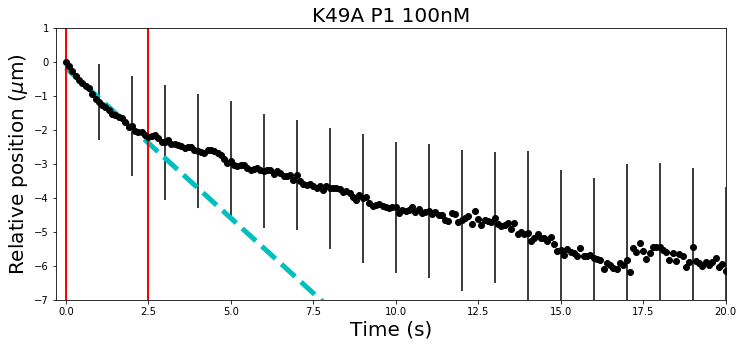

average decompaction rate:  0.88 um/min
average decompaction rate:  3357.60 bp/min


In [25]:
Averaged = sorted([(t,np.mean(p)) for t, p in D.items()], key=lambda x: x[0])
errors = sorted([(t,np.std(p)) for t, p in D.items()], key=lambda x: x[0])
t,a = map(list, zip(*Averaged))
_,s = map(list, zip(*errors))


l,r1 = 0,25
fig = plt.figure(figsize = (12,5))
ax1 = fig.add_subplot(111)
ax1.errorbar(t,a, yerr = s, 
             marker = "o", linestyle = "None", 
             errorevery=10, color = "k") 

p1,e = curve_fit(straight_line,t[l:r1],a[l:r1])
ax1.plot(t,straight_line(np.array(t),*p1), "c--", linewidth = 5)

ax1.axvline(x=t[l],color = "red", linewidth = 2)
ax1.axvline(x=t[r1],color = "red", linewidth = 2)

ax1.set_xlim(-0.3,20)
ax1.set_ylim(-7,1)
ax1.set_xlabel("Time (s)", fontsize = 20)
ax1.set_ylabel("Relative position ($\mu$m)",
               fontsize = 20)
ax1.set_title("K49A P1 100nM", fontsize = 20)
plt.show()

print("average decompaction rate: ","{:.2f}".format(-1*p1[0]),"um/min")
print("average decompaction rate: ","{:.2f}".format(((-1*p1[0])/.266)*(48502/48)),"bp/min")


For WT
average decompaction rate:  0.46 um/min
average decompaction rate:  1732.05 bp/min

$$
\begin{align}
\Delta \Delta G^\ddagger_{2 \to 1} = k_bT\ln \left [\frac{k_d^{(1)}}{k_d^{(2)}} \right]=k_bT\ln \left [\frac{v^{(1)}}{v^{(2)}} \right]
\end{align}
$$


In [32]:
print("relative to WT P1 --> ΔΔG = ","{:.2f}".format(np.log(0.99/0.46)),"kT") 

relative to WT P1 --> ΔΔG =  0.77 kT
